<a href="https://colab.research.google.com/github/Jaiharish-passion07/Third_Classification_capstone_project/blob/master/Individual_classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import time
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#All Machine learning Models are imported here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
#Loading the data
df=pd.read_excel('/content/drive/MyDrive/Classification Project/data_airline_reviews.xlsx')

In [5]:
df_clean=df.loc[~df.isnull().all(axis=1),:]

In [6]:
#Head of Data
df_clean.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [7]:
#Statistical information about data
df_clean.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
#Remove Unwanted Column
airline_df=df_clean.drop(['airline','author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,7.0,NaN,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,2.0,NaN,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,3.0,NaN,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,10.0,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,1.0,NaN,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [9]:
#Percentage of null values 
airline_df.isnull().sum()/len(airline_df)*100

overall             2.926593
aircraft           70.100232
traveller_type     39.716742
cabin               4.009280
seat_comfort        7.985200
cabin_service       7.933644
food_bev           20.226849
entertainment      32.987096
ground_service     40.318741
value_for_money     2.990280
recommended         2.285168
dtype: float64

In [10]:
#Splitting the Numeric column

#Col_1 datas have low percentage of null values
col_1=['overall','seat_comfort','cabin_service','value_for_money']
#Col_2 datas have high percentage of null values
col_2=['food_bev','entertainment','ground_service']

###EDA

1)Which Traveller_type has more ratings?<br>
2)Which type of Cabin has more recommendation?<br>
3)Is it Solo Leisure worth for Money?<br>
4)In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

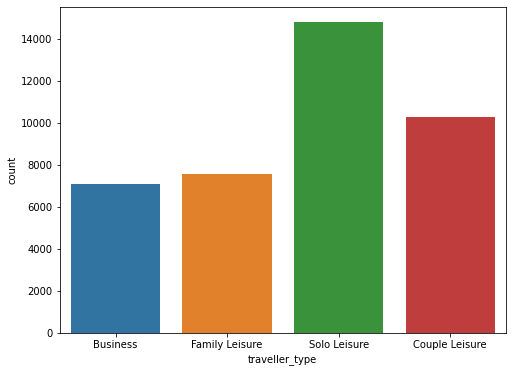

In [11]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['traveller_type'])

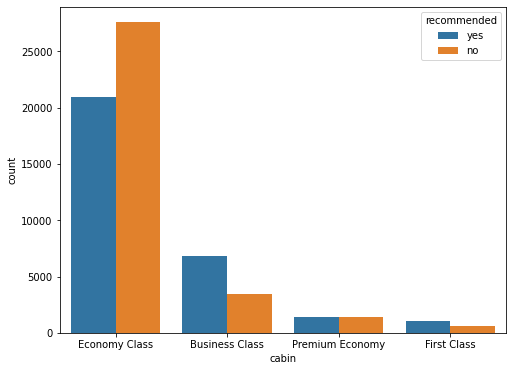

In [12]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['cabin'],hue=airline_df['recommended'])

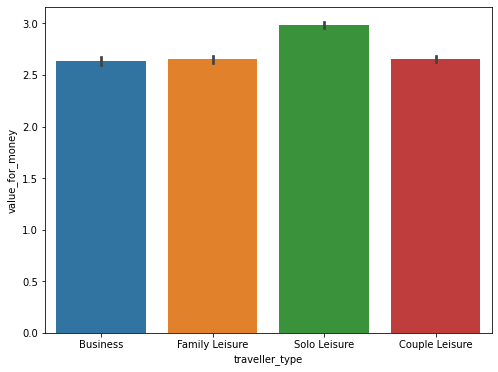

In [13]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'])